# Практическая работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 0383 Желнин Максим, Рудакова Юлия и Петровская Евгения. Вариант №17.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

**Аналоговый сигнал** — это непрерывный сигнал, который может принимать любое значение в заданном диапазоне. Например, звуковые волны являются аналоговыми сигналами.

**Дискретный сигнал** — это сигнал, который изменяется только в определенные моменты времени и может принимать только определенные значения. Например, сигналы, получаемые от датчиков температуры или давления, являются дискретными.

**Цифровой сигнал** — это дискретный сигнал, который закодирован в виде последовательности битов (двоичных цифр). Цифровой сигнал может быть передан и обработан с помощью компьютеров и других электронных устройств. Например, звуковые файлы и видеофайлы являются цифровыми сигналами.

**Частота дискретизации ($f_d$)** — это количество отсчетов (измерений) аналогового сигнала в единицу времени, которое используется для преобразования аналогового сигнала в цифровой. Частота дискретизации определяет точность и качество цифрового сигнала, так как чем выше частота дискретизации, тем более точно будет воспроизведен аналоговый сигнал в цифровом виде.

**Единичный цифровой импульс** - это идеальный импульс, который имеет бесконечно короткую длительность и амплитуду равную единице. Формула единичного цифрового импульса, также известного как дельта-функция Дирака, выглядит следующим образом:

$$\delta_d(k)=
\begin{cases}
1, & k=0,\\
0, & k\neq0.
\end{cases}
,n=...,-2,-1,0,1,2,...$$


**Дискретный единичный скачок**-  это изменение значения сигнала в определенный момент времени на фиксированную величину. Формула дискретного скачка выглядит следующим образом:
$$\sigma_d(k)=
\begin{cases}
1, & k\geq0,\\
0, & k<0.
\end{cases}
,k=...,-2,-1,0,1,2,...$$

**Дискретная экспоненциальная функция**
$$s_1(k)=
\begin{cases}
0, & k<0,\\
a^k, & k\geq0.
\end{cases}
,k=...,-2,-1,0,1,2,...$$
**Дискретная затухающая синусоида**:
$$s(k)=a^kcos(k\omega+\varphi)$$
**Дискретный комплексный гармонический сигнал**:
$$s_2(n)=Cexp(j\hat\omega_0k)$$


## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  
Пояснить:  
    a. взаимосвязь между дискретным и дискретным нормированным временем;  
    b. различие между единичным цифровым импульсом и дельта-функцией.  

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$
с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  
Пояснить:  
    a. соответствие между дискретным и аналоговым единичными скачками;  
    b. чему равна частота дискретизации дискретного единичного скачка.  

3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in [0,(N−1)T]$ и дискретного нормированного времени $n \in [0,N−1]$.  Пояснить соответствие между дискретной и аналоговой экспонентами.

4. Смоделировать дискретный комплексный гармонический сигнал $s_2(k)=C \cdot exp(j\hat{\omega}_0k)$с выводом графиков вещественной и мнимой частей на интервале времени $n \in [0,N−1]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.  
5. Вывести графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на m отсчетов, на интервале времени $n \in [0,N−1]$. Записать формулы задержанных последовательностей.  

6. Сделать выводы.


## Выполнение работы



### 0. Импорт библиотек и определение переменных в зависимости от варианта

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Nb = 17
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
m = 5 + Nb % 5

print("""Nb = {}\nN = {}\nT = {}\na = {}\nC = {}\nw0 = {}\nm = {}""".format(Nb, N, T, a, C, w0, m))

Nb = 17
N = 32
T = 0.0015
a = -0.885
C = 3
w0 = 0.39269908169872414
m = 7


### 1. Единичный цифровой импульс

In [2]:
def delta_d(k):
   return np.where(k == 0, 1, 0)

k = np.arange(N)
t_normalize = np.arange(N)
t_discrete = t_normalize * T

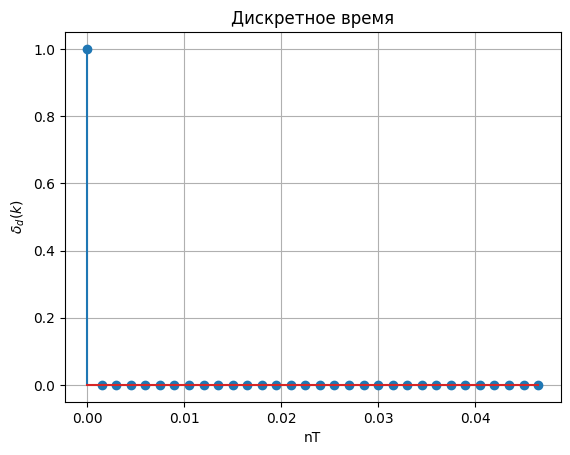

In [24]:
plt.stem(t_discrete, delta_d(k))
plt.grid(True)
plt.title("Дискретное время")
plt.xlabel('nT')
plt.ylabel('$\delta_d(k)$')
plt.show()

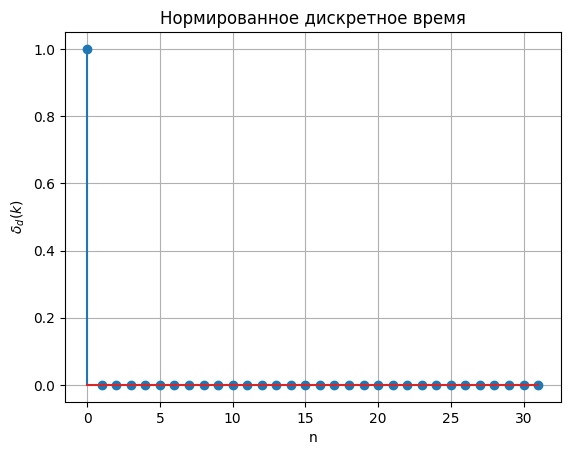

In [23]:
plt.stem(t_normalize, delta_d(k))
plt.grid(True)
plt.title("Нормированное дискретное время")
plt.xlabel('n')
plt.ylabel('$\delta_d(k)$')
plt.show()

#### a. Взаимосвязь между дискретным и дискретным нормированным временем.

Дискретное время $nT$ зависит от периода дискретизации $T$, а нормированное дискретное время не зависит от $T$, или, можно сказать, что его $T = 1$



#### b. Различие между единичным цифровым импульсом и дельта-функцией.

Единичный цифровой импульс - это дискретный аналог дельта-функции, который представляет собой дискретную функцию с амплитудой скачка равной 1. Он используется для моделирования мгновенных всплесков или событий в дискретном времени. В отличие от дельта-функции, которая является непрерывной и имеет бесконечный скачок амплитуды в одной точке времени, единичный цифровой импульс не зависит от выбора периода дискретизации и может быть использован для моделирования импульсов различной длительности в дискретном времени.


### 2. Дискретный единичный скачок

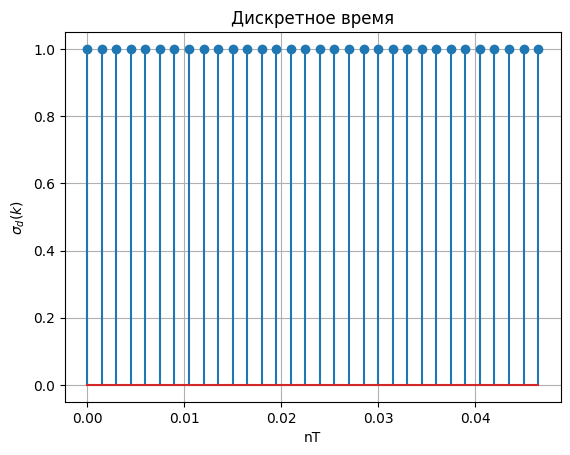

In [20]:
def calculate_sigma(k):
   return np.where(k >= 0, 1, 0)

plt.stem(t_discrete, calculate_sigma(k))
plt.grid(True)
plt.title("Дискретное время")
plt.xlabel('nT')
plt.ylabel('$\sigma_d(k)$')
plt.show()

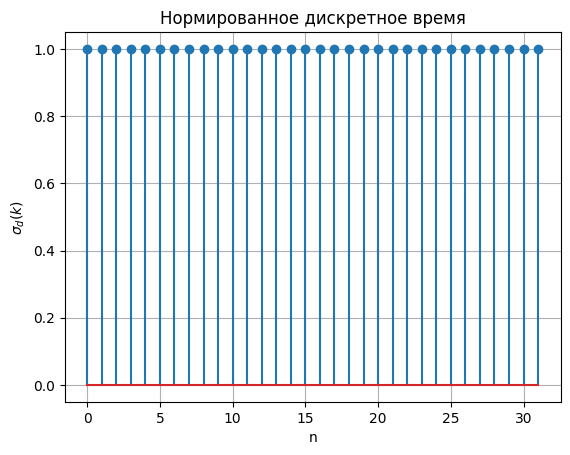

In [19]:
plt.stem(t_normalize, calculate_sigma(k))
plt.grid(True)
plt.title("Нормированное дискретное время")
plt.xlabel('n')
plt.ylabel('$\sigma_d(k)$')
plt.show()

#### а. Соответствие между дискретным и аналоговым единичными скачками.

И дискретный и аналоговый единичные скачки представляют мгновенные переходы с нулевой амплитуды к амплитуде 1 в определенный момент времени или дискретном отсчете. Однако дискретный единичный скачок применяется к дискретным сигналам и времени, а аналоговый единичный скачок применяется к аналоговым сигналам и непрерывному времени.

#### b.Чему равна частота дискретизации дискретного единичного скачка.
$f_d = \frac{1}{T} = 666.67$.

In [7]:
1/T

666.6666666666666

### 3. Дискретная экспоненциальная функция

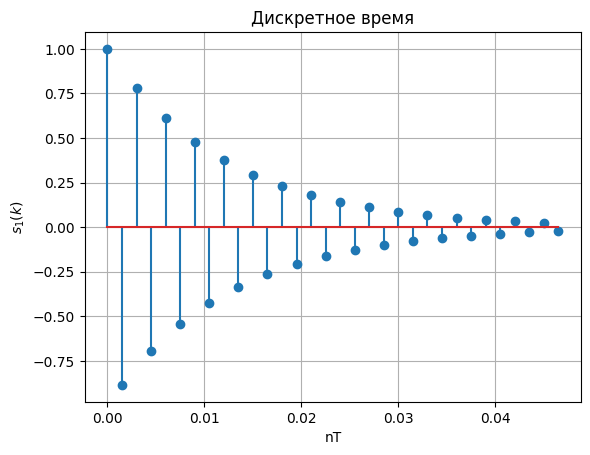

In [17]:
def calculate_S1(k_arr, m = 0):
    return [a ** k * (k >= m) for k in k_arr]

plt.stem(t_discrete, np.real(calculate_S1(k.tolist())))
plt.grid(True)
plt.title('Дискретное время')
plt.xlabel('nT')
plt.ylabel('$s_1(k)$')
plt.show()

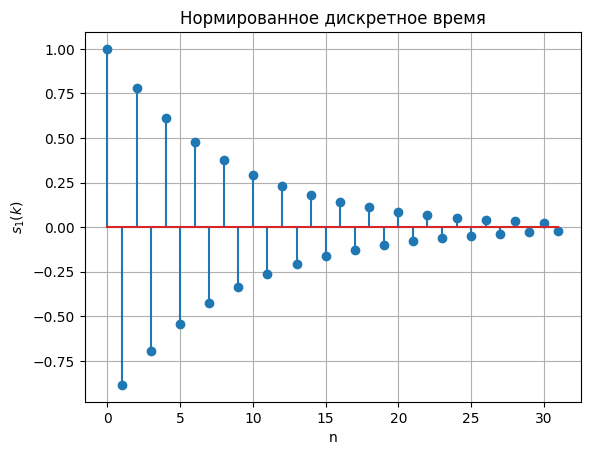

In [18]:
plt.stem(t_normalize, calculate_S1(k))
plt.grid(True)
plt.title('Нормированное дискретное время')
plt.xlabel('n')
plt.ylabel('$s_1(k)$')
plt.show()

#### Соответствие между дискретной и аналоговой экспонентами

Экспоненциальные функции могут использоваться для моделирования различных процессов в дискретном или непрерывном времени. Дискретные экспоненты описывают убывающие или растущие процессы в дискретных системах. Аналоговые экспоненты, с другой стороны, используются для моделирования непрерывных процессов. Важно отметить, что при отрицательных значениях параметра $k$ аналоговая функция имеет значения, равные $a^k$, в то время как дискретная функция принимает нулевые значения для таких отрицательных значений $k$.

### 4. Дискретный комплексный гармонический сигнал

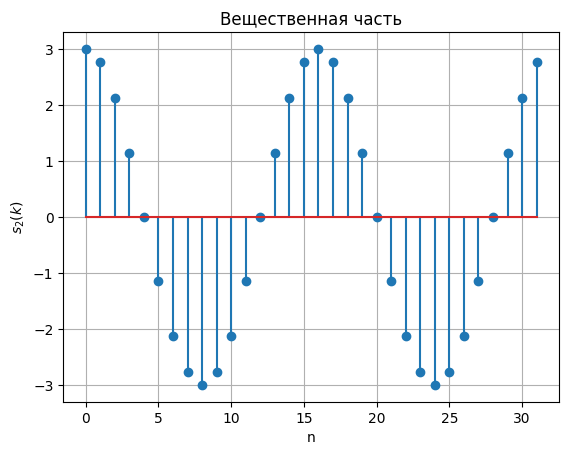

In [25]:
def calculate_S2(k):
    return C * np.exp(1j * (w0 * k))

plt.stem(t_normalize, np.real(calculate_S2(k)))
plt.grid(True)
plt.title("Вещественная часть")
plt.xlabel('n')
plt.ylabel('$s_2(k)$')
plt.show()

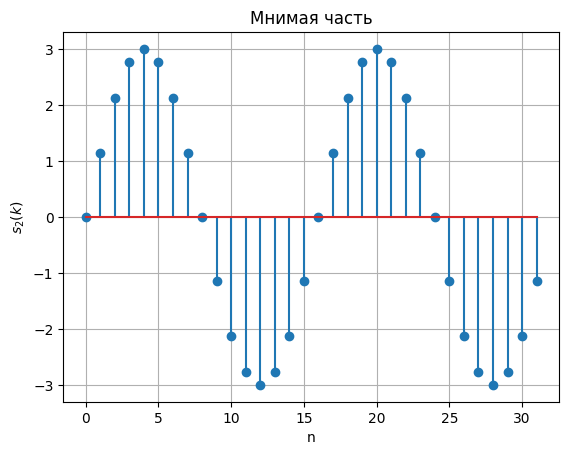

In [26]:
plt.stem(t_normalize, np.imag(calculate_S2(k)))
plt.grid(True)
plt.title("Мнимая часть")
plt.xlabel('n')
plt.ylabel('$s_2(k)$')
plt.show()

#### Данный сигнал в виде комбинации двух вещественных последовательностей

Вещественная часть описывается функцией косинуса $cos(\hatω_0k)$, а мнимая функцией синуса $sin(\hatω_0k)$.

Отсюда по формуле Эйлера: $C \cdot e^{j \hat{\omega}_0 k} = C \cdot cos(\hat{\omega}_0 k) + j \cdot C \cdot sin(\hat{\omega}_0 k)$

### 5. Графики последовательностей $\delta_d(k), \sigma_d(k)$ и $s_1(k)$, задержанных на m отсчетов

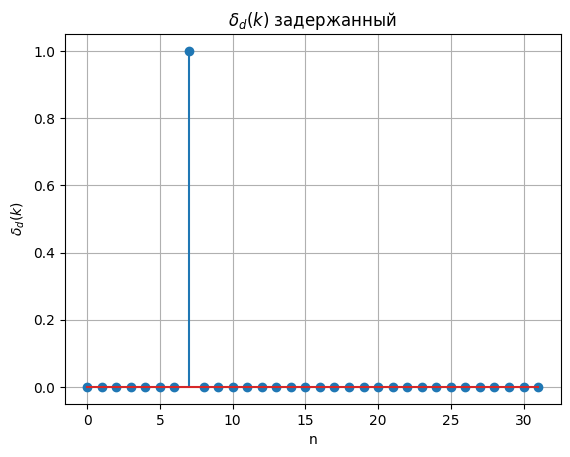

In [12]:
plt.stem(t_normalize, delta_d(k-m))
plt.title("$\delta_d(k)$ задержанный")
plt.xlabel('n')
plt.ylabel('$\delta_d(k)$')
plt.grid(True)
plt.show()

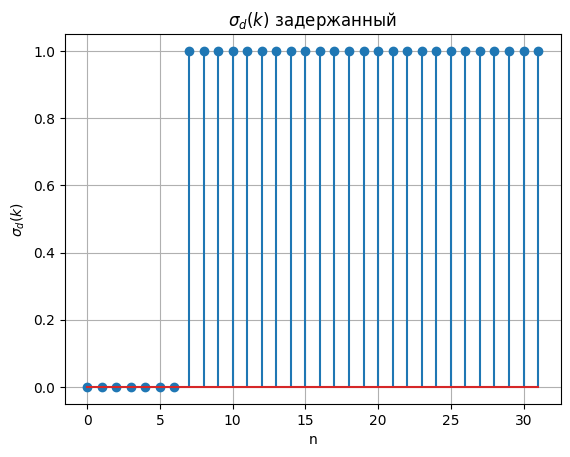

In [13]:

plt.stem(t_normalize, calculate_sigma(k-m))
plt.grid(True)
plt.title("$\sigma_d(k)$ задержанный")
plt.xlabel('n')
plt.ylabel('$\sigma_d(k)$')
plt.show()

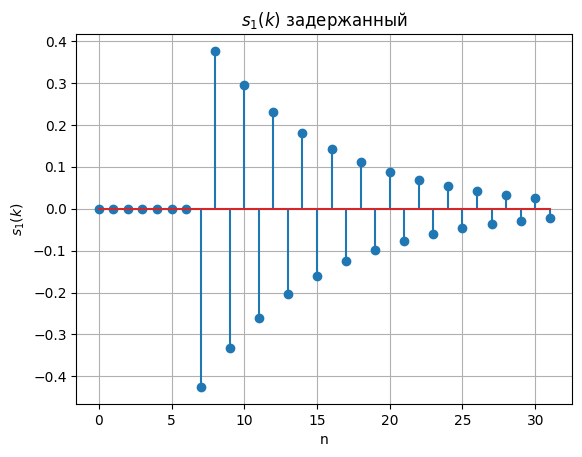

In [14]:
plt.stem(t_normalize, calculate_S1(k, m))
plt.grid(True)
plt.title("$s_1(k)$ задержанный")
plt.xlabel('n')
plt.ylabel('$s_1(k)$')
plt.show()

#### Формулы задержанных последовательностей

$$\delta_d(k)=
\begin{cases}
1, & k-m=0,\\
0, & k-m\neq0.
\end{cases}
$$

$$\sigma_d(k)=
\begin{cases}
1, & k-m\geq0,\\
0, & k-m<0.
\end{cases}
$$

$$s(k)=
\begin{cases}
0, & k-m<0,\\
a^{(k-m)}, & k-m\geq0.
\end{cases}
$$

## Выводы

В процессе работы были исследованы математические модели стандартных дискретных сигналов, а также были созданы соответствующие модели при помощи Python и его библиотек. Среди изученных сигналов были единичный цифровой импульс, который является дискретным аналогом дельта-функции, дискретный единичный скачок, представляющий собой последовательность со значением, изменяющимся мгновенно с нуля на единицу при начале отсчета, дискретная экспоненциальная функция, используемая для моделирования убывающих или растущих процессов в дискретном времени, а также дискретный комплексный гармонический сигнал, выраженный в виде комбинации вещественных последовательностей.